In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# $Bern(\theta)$

In [2]:
N = 1000
K = 500
count = 100
theta = np.arange(0,1,0.01)

### График нижней оценки дисперсии несмещенной оценки параметра $\theta$

По неравенству Рао-Крамера $D_{\theta}\hat{\theta}(X) \geq \frac{1}{I_{X}(\theta)}$

$I_{X}(\theta) = \frac{n}{\theta(1-\theta)}$

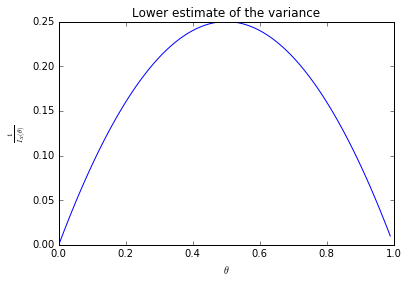

In [3]:
plt.plot(theta, theta*(1-theta))
plt.xlabel('$\\theta$')
plt.ylabel('$\\frac{1}{I_{X}(\\theta)}$')
plt.title('Lower estimate of the variance')
plt.show()

### Вывод

Чем дальше значение параметра от среднего тем более вероятно случайная величина принимает какое-то одно значение, как следствие меньший "разброс значений" => минимальное значение дисперсии может быть меньше. При $\theta = 5$ минимальная дисперсия максимальна, т.к. в выборке нет уплотнения реализации около одного значения и распределение "более размазано" вдоль оси значений => дисперсия больше.

## $\bar{X}$ эффективная оценка параметра $\theta$

Расчет бурстрепной дисперсии для $n \leq N = 1000$

In [4]:
mean_bern = np.zeros(count)
var_bern = np.zeros(count)
for t in xrange(0,count):
    # генерируем Bern(theta)
    bern_rv = sts.bernoulli(theta[t])

    sample = bern_rv.rvs(N)
    rating = np.mean(sample)
    bytstrep_rv = sts.bernoulli(rating)
    
    bytstrep_rating = np.zeros(K)
    
    for x in xrange(0, K):
        # генерируем выбороку размера N
        bytstrep_sample = bytstrep_rv.rvs(N)
        # добавляем итоговые оценки параметра
        bytstrep_rating[x] = np.mean(bytstrep_sample)
    
    mean_bern[t] = np.mean(bytstrep_rating)
    var_bern[t] = np.var(bytstrep_rating)

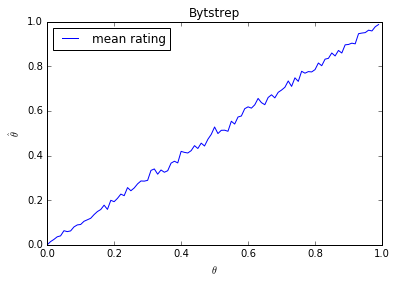

In [5]:
# построение графиков
plt.plot(theta, mean_bern, label = 'mean rating')
#plt.plot(theta, var_bern, label = 'var rating')
plt.xlabel('$\\theta$')
plt.ylabel('$\\hat{\\theta}$')
plt.legend(loc = 'upper left')
#plt.ylim(-0.00005,0.00005)
plt.title("Bytstrep")
plt.show()